# Exercise 2

## 2.1

Assume scaling $\vec{x}/\xi=\tilde{\vec{x}}, \vec{v}/\phi=\tilde{\vec{v}}, t/\tau = \tilde{t}$ and $m/\mu = \tilde{m}$. Let us substitue these expressions into the equations for $\tilde x, \tilde v, \tilde t$ 
$$\begin{aligned}
\frac{d \tilde{{x}}_{i}}{d \tilde{t}} &=\tilde{\tilde{v}}_{i} \\
\tilde{m}_{i} \frac{d \tilde{v}_{i}}{d \tilde{t}} &=\tilde{m}_{i} \sum_{k \neq i} \tilde{m}_{k} \frac{\tilde{\tilde{x}}_{k}-\tilde{\bar{x}}_{i}}{\left|\tilde{\vec{x}}_{k}-\tilde{\tilde{x}}_{i}\right|^{3}}
\end{aligned}$$
In order for them to give back the intial equations without the scaling, they have to obey the following relations:
$$
\frac{\tau\phi}{\xi} = 1 \\
\frac{\xi^3}{\tau^2\mu} = G.
$$
Since we have 4 variables in two equations, two of them can be freely chosen, determining the other two of them.

# 2.2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# leap frog N body algorithm

def leapfrogN(M, X0, V0, Nt, dt, acc):
    """M: array with mass values; X0 & V0: Nx3 arrays with initial
    conditions of positions and velocities; Nt: number of time steps; dt: 
    time step size; acc: function that evaluates and gives back Nx3 array
    with accelerations for given positions and masses"""
    N = np.shape(M)[0]
    t = np.arange(0,dt*Nt,dt)
    X = np.zeros((N,3,Nt))
    V = np.zeros((N,3,Nt))
    
    X[:,:,0] = X0
    V[:,:,0] = V0
    
    for i in range(Nt-1):
        vhalf = V[:,:,i] + acc(M,X[:,:,i])*dt/2
        X[:,:,i+1] = X[:,:,i] + vhalf*dt
        V[:,:,i+1] = vhalf + acc(M,X[:,:,i+1])*dt/2
    
    return t, X, V
    
    

In [5]:
# RHS of dv/dt aka acceleration
def newton_acc(M,X):
    
    N = np.shape(M)[0]
    A = np.zeros((N,3))
    
    for i in range(N):
        for j in range(N):
            if i==j:
                continue
            A[i,:] += M[j]*(X[j,:] - X[i,:])/(np.linalg.norm(X[j,:] - X[i,:]))**3
    
    return A

X0 = [[-0.5  0.   0. ]
 [ 0.5  0.   0. ]]
V0 = [[ 0.  -0.5  0. ]
 [ 0.   0.5  0. ]]
M = [1 1]


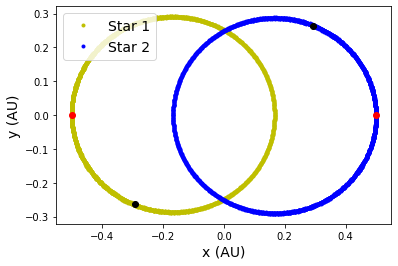

In [12]:
# 2.2: binary star problem
N = 2
M = np.array((1,1))
X0 = np.zeros((N,3))
X0[0,0] = -0.5
X0[1,0] = 0.5
V0 = np.zeros((N,3))
V0[0,1]  = -0.5
V0[1,1] = 0.5

print(f'X0 = {X0}')
print(f'V0 = {V0}')
print(f'M = {M}')


dt = 1e-2
T = 20
Nt = int(T/dt)

t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc)

fig = plt.figure()
plt.plot(X[0,0,:],X[0,1,:], 'y.', X[1,0,:],X[1,1,:],'b.')
plt.plot(X[0,0,0],X[0,1,0],'ro',X[1,0,0],X[1,1,0],'ro')
plt.plot(X[0,0,-1],X[0,1,-1],'ko',X[1,0,-1],X[1,1,-1],'ko')
plt.legend(['Star 1','Star 2'], loc='upper left', fontsize=14)
plt.xlabel('x (AU)', fontsize=14); plt.ylabel('y (AU)', fontsize=14)
plt.show()

The yellow line indicates the orbit of the first star, the blue one the orbit of the second star. The red points stand for the initial state, the black ones for the final state.

## 2.3

Let us now add add a third start

X0 = [[-0.5  0.   0. ]
 [ 0.5  0.   0. ]
 [ 1.   6.   2. ]]
V0 = [[ 0.  -0.5  0. ]
 [ 0.   0.5  0. ]
 [ 0.   0.   0. ]]
M = [1.  1.  0.1]


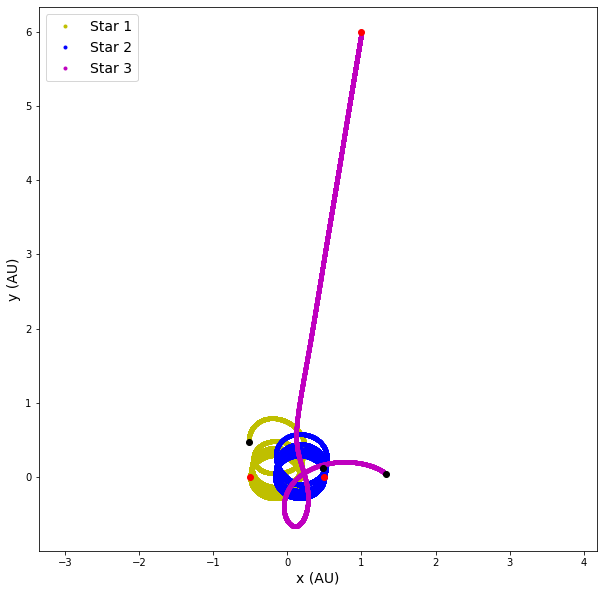

In [11]:
# 2.3: + third star:
N = 3
M = np.array((1,1,0.1))
X0 = np.zeros((N,3))
X0[0,0] = -0.5
X0[1,0] = 0.5
X0[2,:] = np.array((1,6,2))
V0 = np.zeros((N,3))
V0[0,1]  = -0.5
V0[1,1] = 0.5

print(f'X0 = {X0}')
print(f'V0 = {V0}')
print(f'M = {M}')

dt = 1e-3
T = 15
Nt = int(T/dt)

t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc)

fig = plt.figure(figsize=(10,10))
plt.plot(X[0,0,:],X[0,1,:], 'y.', X[1,0,:],X[1,1,:],'b.', X[2,0,:],X[2,1,:],'m.')
plt.legend(['Star 1','Star 2', 'Star 3'], loc='upper left', fontsize=14)
plt.plot(X[0,0,0],X[0,1,0],'ro',X[1,0,0],X[1,1,0],'ro',X[2,0,0],X[2,1,0],'ro')
plt.xlabel('x (AU)', fontsize=14); plt.ylabel('y (AU)', fontsize=14)
plt.plot(X[0,0,-1],X[0,1,-1],'ko',X[1,0,-1],X[1,1,-1],'ko',X[2,0,-1],X[2,1,0-1],'ko')
plt.axis('equal')
plt.show()

## 2.4

Let us choose $\text{dt}' = 10 \, \text{dt}$ and initial condition for the third star $\vec x_3 = (1, 6, 3)$

X0 = [[-0.5  0.   0. ]
 [ 0.5  0.   0. ]
 [ 1.   6.   3. ]]
V0 = [[ 0.  -0.5  0. ]
 [ 0.   0.5  0. ]
 [ 0.   0.   0. ]]
M = [1.  1.  0.1]


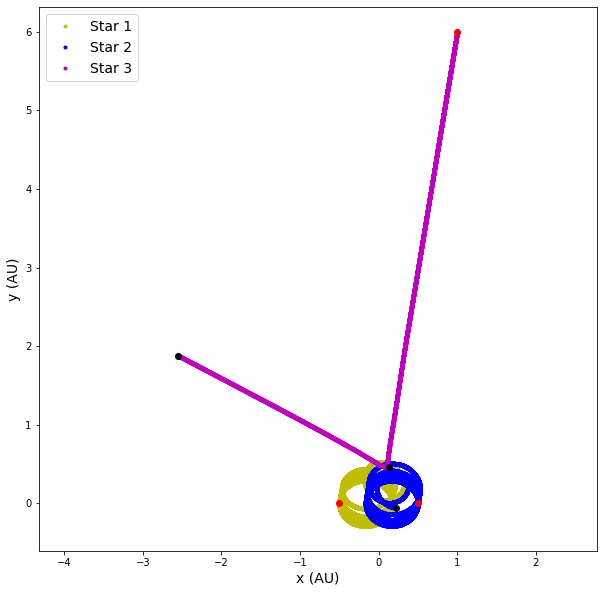

In [10]:
# altered x3
N = 3
M = np.array((1,1,0.1))
X0 = np.zeros((N,3))
X0[0,0] = -0.5
X0[1,0] = 0.5
X0[2,:] = np.array((1,6,3))
V0 = np.zeros((N,3))
V0[0,1]  = -0.5
V0[1,1] = 0.5

print(f'X0 = {X0}')
print(f'V0 = {V0}')
print(f'M = {M}')

dt = 1e-3
T = 15
Nt = int(T/dt)

t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc)

fig = plt.figure(figsize=(10,10))
plt.plot(X[0,0,:],X[0,1,:], 'y.', X[1,0,:],X[1,1,:],'b.', X[2,0,:],X[2,1,:],'m.')
plt.legend(['Star 1','Star 2', 'Star 3'], loc='upper left', fontsize=14)
plt.plot(X[0,0,0],X[0,1,0],'ro',X[1,0,0],X[1,1,0],'ro',X[2,0,0],X[2,1,0],'ro')
plt.xlabel('x (AU)', fontsize=14); plt.ylabel('y (AU)', fontsize=14)
plt.plot(X[0,0,-1],X[0,1,-1],'ko',X[1,0,-1],X[1,1,-1],'ko',X[2,0,-1],X[2,1,0-1],'ko')
plt.axis('equal')
plt.show()